# Unsupervised Machine Learning Clustering

imports:

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering, MeanShift, DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

## Load data

In [48]:
data = pd.read_csv("https://raw.githubusercontent.com/AlexandruSchneider/data_science/main/datasets/penguins/penguins_lter.csv")
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

## Prepare Data

Remove unnecessairy columns
Columns which are constant or used for identification

In [50]:
data = data.drop(["Species", "studyName", "Sample Number", "Individual ID", "Comments", "Stage", "Region", "Clutch Completion", "Date Egg"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
 5   Sex                  334 non-null    object 
 6   Delta 15 N (o/oo)    330 non-null    float64
 7   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(2)
memory usage: 21.6+ KB


In [51]:
data.isna().sum()

Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Remove NA data

In [52]:
data = data.dropna()
data.isna().sum()

Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Remove datarow where sex = "."

In [53]:
data = data[data.Sex != "."]

Encode Strings to float values

In [54]:
encoder = OrdinalEncoder()
data[["Island", "Sex"]] = encoder.fit_transform(data[["Island", "Sex"]])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               324 non-null    float64
 1   Culmen Length (mm)   324 non-null    float64
 2   Culmen Depth (mm)    324 non-null    float64
 3   Flipper Length (mm)  324 non-null    float64
 4   Body Mass (g)        324 non-null    float64
 5   Sex                  324 non-null    float64
 6   Delta 15 N (o/oo)    324 non-null    float64
 7   Delta 13 C (o/oo)    324 non-null    float64
dtypes: float64(8)
memory usage: 22.8 KB


In [55]:
data.head()

,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,2.0,39.5,17.4,186.0,3800.0,0.0,8.94956,-24.69454
2,2.0,40.3,18.0,195.0,3250.0,0.0,8.36821,-25.33302
4,2.0,36.7,19.3,193.0,3450.0,0.0,8.76651,-25.32426
5,2.0,39.3,20.6,190.0,3650.0,1.0,8.66496,-25.29805
6,2.0,38.9,17.8,181.0,3625.0,0.0,9.18718,-25.21799


Use MinMaxScaler to not create bias and rename columns

In [56]:
min_max_scaler = MinMaxScaler()
cols = ["Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", ]
data[cols] = min_max_scaler.fit_transform(data[cols])
data = data.rename(columns={"Culmen Length (mm)": "CulmenLength", "Culmen Depth (mm)": "CulmenDepth", "Flipper Length (mm)": "FlipperLength", "Body Mass (g)": "BodyMass", "Delta 15 N (o/oo)": "Delta15", "Delta 13 C (o/oo)": "Delta13"})
data.head()

,Island,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15,Delta13
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0,0.550450,0.742879
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0,0.307537,0.538785
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0,0.473964,0.541586
5,1.0,0.261818,0.892857,0.305085,0.263889,1.0,0.431532,0.549964
6,1.0,0.247273,0.559524,0.152542,0.256944,0.0,0.649738,0.575555


In [57]:
data.describe()

,Island,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Sex,Delta15,Delta13
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.316358,0.434669,0.479461,0.495187,0.420546,0.496914,0.462864,0.425093
std,0.353327,0.199296,0.234213,0.236588,0.224799,0.500764,0.230680,0.252796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.269091,0.294643,0.305085,0.236111,0.000000,0.280891,0.221125
50%,0.250000,0.467273,0.500000,0.423729,0.375000,0.000000,0.428868,0.375839
75%,0.500000,0.603636,0.654762,0.694915,0.583333,1.000000,0.647356,0.627473
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Island         324 non-null    float64
 1   CulmenLength   324 non-null    float64
 2   CulmenDepth    324 non-null    float64
 3   FlipperLength  324 non-null    float64
 4   BodyMass       324 non-null    float64
 5   Sex            324 non-null    float64
 6   Delta15        324 non-null    float64
 7   Delta13        324 non-null    float64
dtypes: float64(8)
memory usage: 22.8 KB


## Visualize Data

Plot all columns

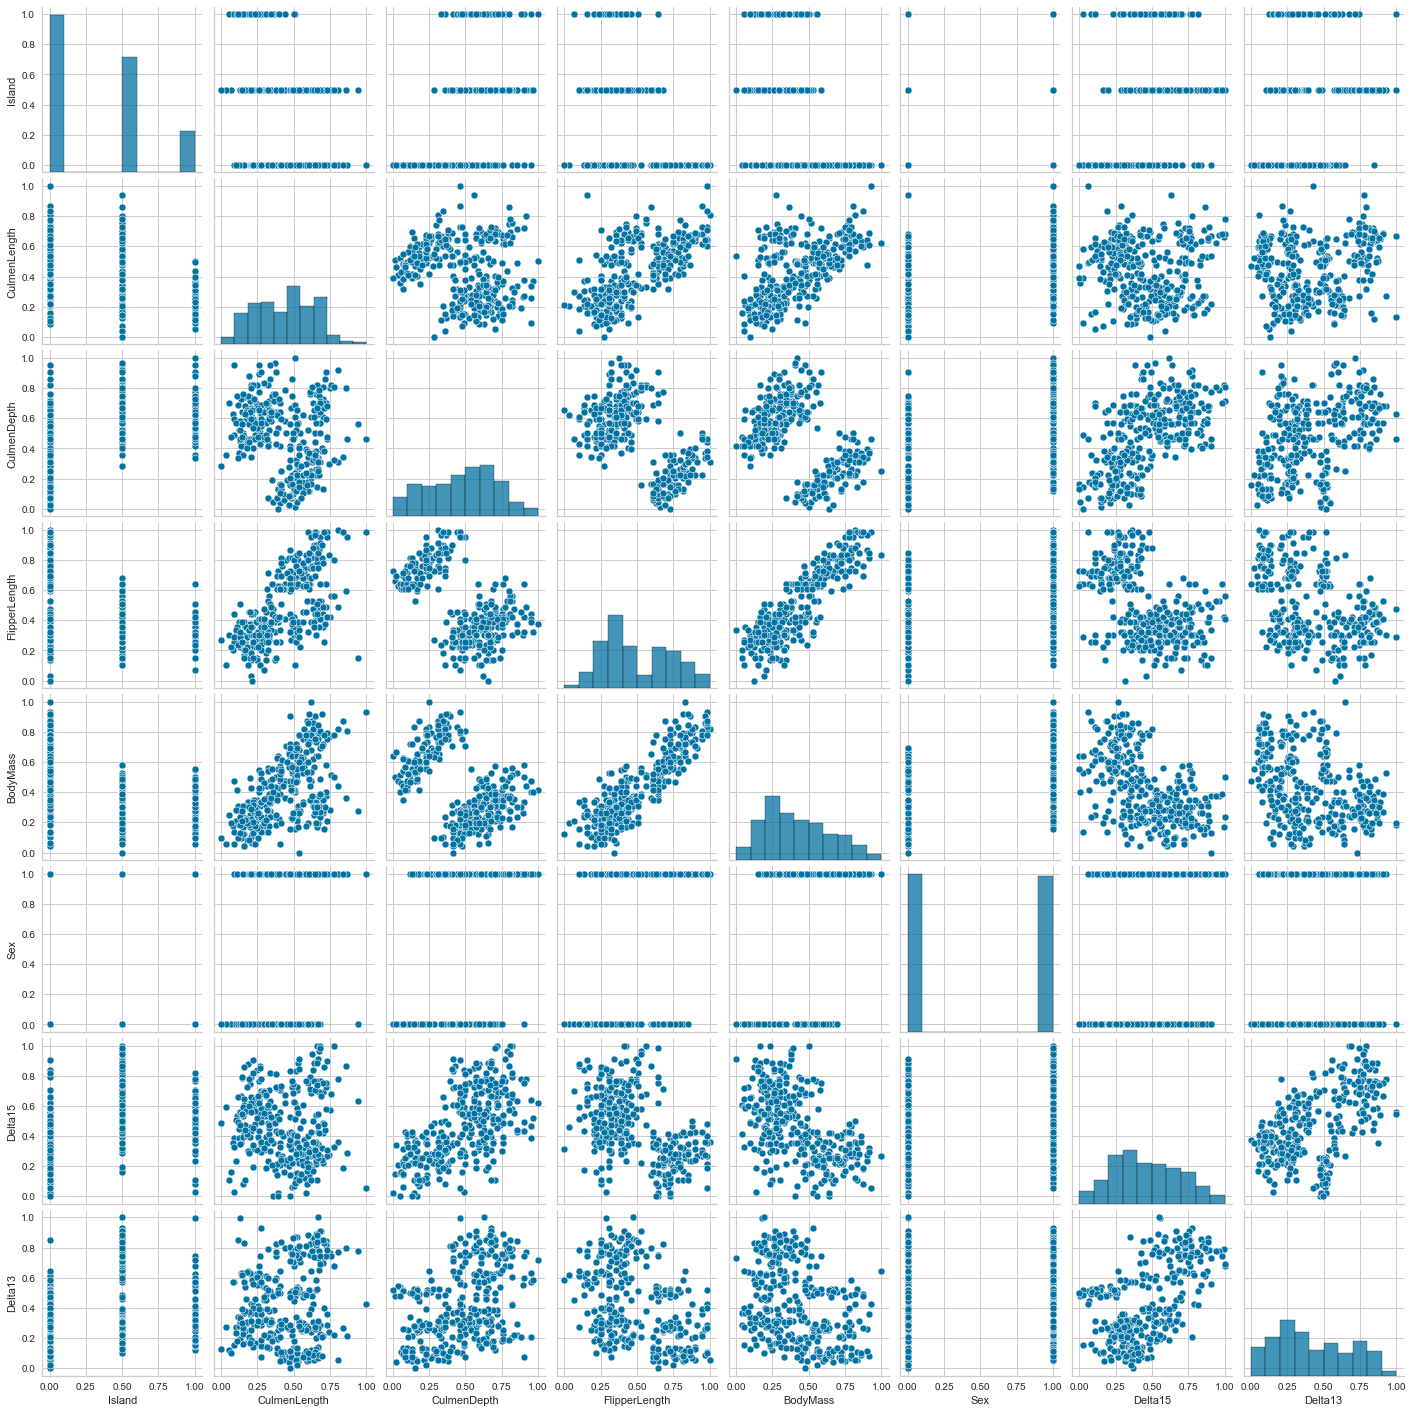

In [59]:
sns.pairplot(data)

## Research Data (make correlations)

Correlation Matrix

<AxesSubplot:>

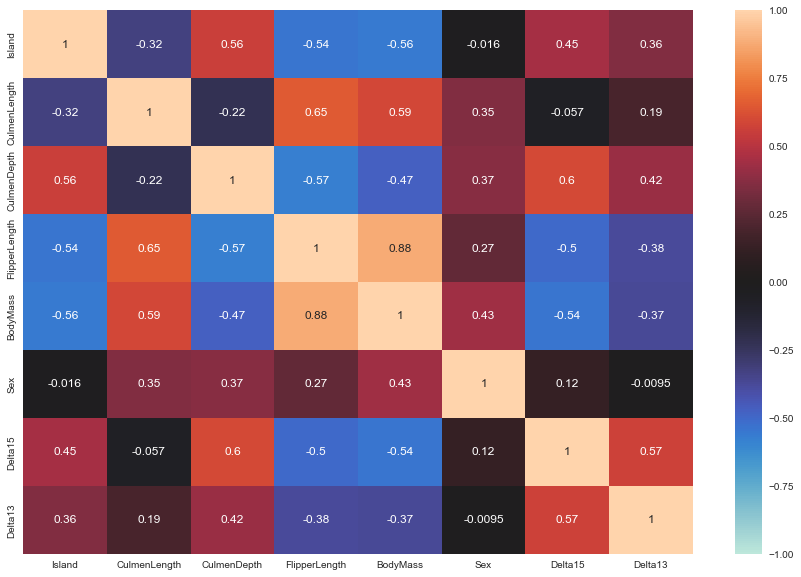

In [60]:
correlations = data.corr(method="pearson")
# fig size
plt.figure(figsize=(15, 10))
# vmin = -1 --> range from [-1, 1]
sns.heatmap(correlations, vmin=-1, vmax=1, cmap="icefire", annot=True)

In Heatmap we can see strong correlation between BodyMass & Flipperlength, CulmenLength & Delta15, BodyMass & CulmenLength

Plot Density with Boxplot

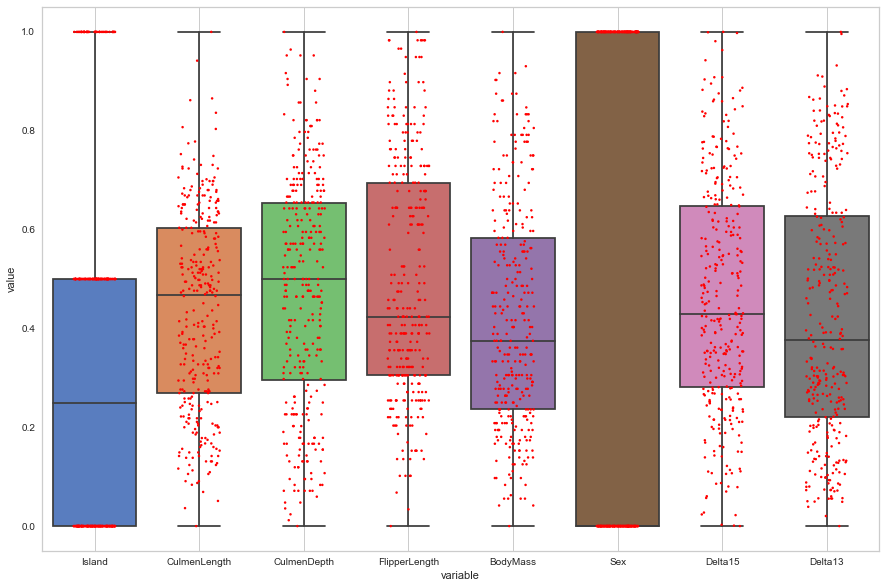

In [61]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(data), palette='muted')
sns.stripplot(x="variable", y="value", data=pd.melt(data), color="red", jitter=0.2, size=2.5)
plt.grid()

Plot with Violinplot

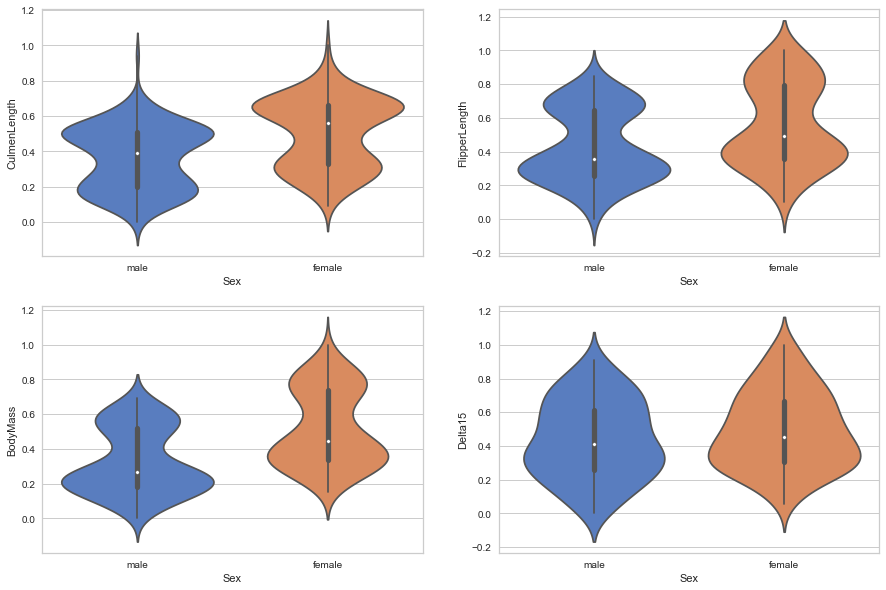

In [62]:
violin_columns = ["CulmenLength", "FlipperLength", "BodyMass", "Delta15"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(violin_columns):
    # 4 figures i want 2x2 plot
    plt.subplot(2, 2, i+1)
    fig2 = sns.violinplot(x=data["Sex"], y=data[col], palette='muted')
    fig2.set_xticklabels(["male", "female"])
plt.show()

Visualize Count Male vs. Female

[Text(0, 0, 'male'), Text(1, 0, 'female')]

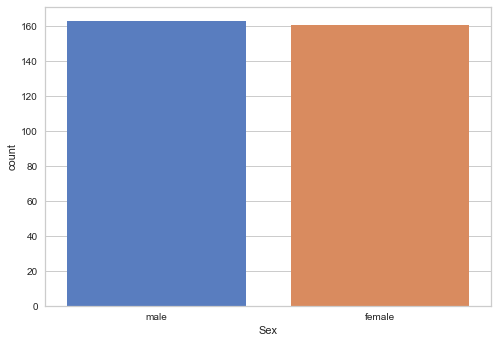

In [63]:
fig = sns.countplot(data=data, x="Sex", palette="muted")
fig.set_xticklabels(["male", "female"])

Find number of clusters

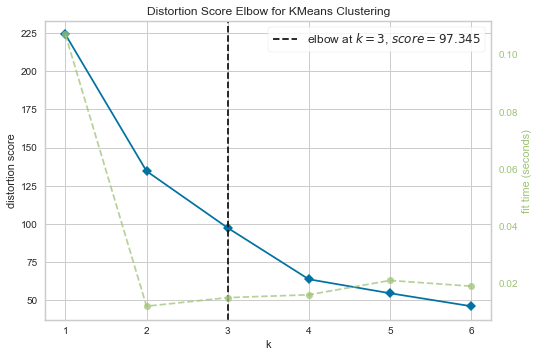

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,7))
visualizer.fit(data)
visualizer.show()

Show Silhouette for 2, 3, 4 and 5 clusters

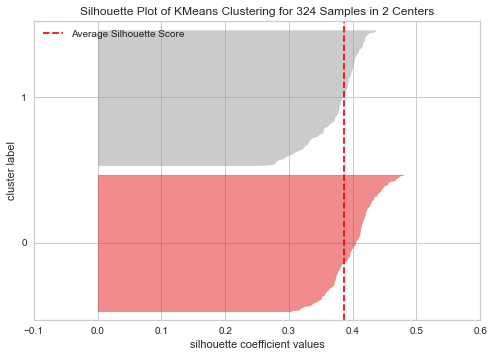

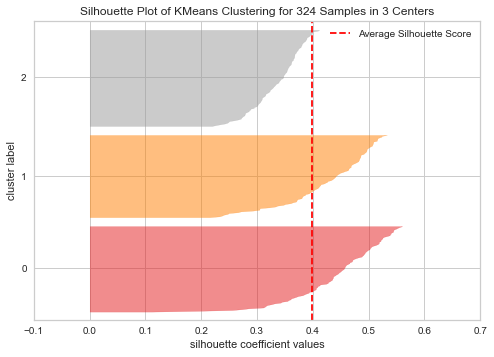

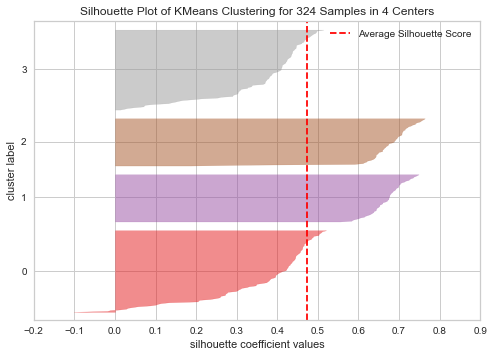

In [ ]:
clusters = [2, 3, 4, 5]
for i in clusters:
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(data)
    visualizer.show()

Decision: k=3

## K-Means Clustering with k=3

In [ ]:
k_means_data = data.copy()
kmean_clusters = [["BodyMass", "FlipperLength"], ["BodyMass", "CulmenLength"], ["BodyMass", "Delta15"],
                  ["FlipperLength", "CulmenLength"], ["FlipperLength", "Delta15"],
                  ["CulmenLength", "Delta15"]]
n_clusters = 3
random_state = 42

# set size of the whole figure
plt.figure(figsize=(16, 10))
for i, cluster in enumerate(kmean_clusters):
    # use KMeans model with 3 clusters and 42 as randomstate for reproducibility
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    # get data with only the clusters
    kmeans_data = k_means_data[cluster]
    # fit model
    model.fit(data)
    # make predictions
    kmeans_pred = model.fit_predict(kmeans_data)
    # save predictions in dataframe
    k_means_data[f"Cluster{i+1}"] = kmeans_pred

    # visualize data
    plt.subplot(2, 3, i+1)
    # add spacing between plots
    plt.subplots_adjust(hspace=0.4, wspace=0.5)
    # Add title with cluster names
    plt.title(f"Clustering by: {cluster}")
    # plot the data ans highlight the different clusters
    sns.scatterplot(kmeans_data.loc[:, cluster[0]], kmeans_data.loc[:, cluster[1]], c=kmeans_pred, s=50, cmap="icefire")
    # get the 3 centers
    centers = model.cluster_centers_
    # add the centers as "x" with red color
    sns.scatterplot(centers[:, 0], centers[:, 1], s=200, color="red", marker="x")

## Spectral Clustering with k = 3

In [ ]:
spectral_data = data.copy()
spectral_clusters = [["BodyMass", "FlipperLength"], ["BodyMass", "CulmenLength"], ["BodyMass", "Delta15"],
                  ["FlipperLength", "CulmenLength"], ["FlipperLength", "Delta15"],
                  ["CulmenLength", "Delta15"]]

n_clusters = 3
random_state = 42


plt.figure(figsize=(16, 10))
for i, cluster in enumerate(spectral_clusters):
    X_sc = spectral_data[cluster]
    sc = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    sc.fit(X_sc)
    y_sc = sc.fit_predict(X_sc)
    spectral_data[f"Cluster{i+1}"] = y_sc

    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.5)
    plt.title(f"Clustering by: {cluster}")
    sns.scatterplot(X_sc.loc[:, cluster[0]], X_sc.loc[:, cluster[1]], c=y_sc, s=50, cmap="icefire")


## Mean Shift Clustering

In [ ]:
mean_shift_data = data.copy()
# ["BodyMass", "CulmenLength", "FlipperLength", "Delta15"]
mean_shift_clusters = [["BodyMass", "CulmenLength", "FlipperLength"],
                       ["BodyMass", "CulmenLength", "Delta15"],
                       ["BodyMass", "Delta15", "FlipperLength"],
                       ["Delta15", "CulmenLength", "FlipperLength"]]

plt.figure(figsize=(15, 10))
for i, cluster in enumerate(mean_shift_clusters):
    X_ms = mean_shift_data[cluster]
    ms = MeanShift()
    ms.fit(X_ms)
    y_ms = ms.fit_predict(X_ms)
    mean_shift_data[f"Cluster{i+1}"] = y_ms

    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.5)
    plt.title(f"Clustering by: {cluster}")
    sns.scatterplot(X_ms.loc[:, cluster[0]], X_ms.loc[:, cluster[1]], c=y_ms, s=50, cmap="icefire")

## DBScan

In [ ]:
dbscan_data = data.copy()
dbscan_clusters = [["BodyMass", "FlipperLength"], ["BodyMass", "CulmenLength"], ["BodyMass", "Delta15"],
                  ["FlipperLength", "CulmenLength"], ["FlipperLength", "Delta15"],
                  ["CulmenLength", "Delta15"]]

plt.figure(figsize=(16, 10))
for i, cluster in enumerate(spectral_clusters):
    X_db = spectral_data[cluster]
    db = DBSCAN(eps=0.05, min_samples=6)
    db.fit(X_db)
    y_db = db.fit_predict(X_db)
    dbscan_data[f"Cluster{i+1}"] = y_db

    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.4, wspace=0.5)
    plt.title(f"Clustering by: {cluster}")
    sns.scatterplot(X_db.loc[:, cluster[0]], X_db.loc[:, cluster[1]], c=y_db, s=50, cmap="icefire")